In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 


In [2]:
data = pd.read_csv('train.csv')

In [3]:
data=np.array(data)
m,n=data.shape
np.random.shuffle(data)

data_dev=data[0:1000].T
Y_dev=data_dev[0]
X_dev=data_dev[1:n]
X_dev=X_dev/255

data_train=data[1000:m].T
Y_train=data_train[0]
X_train=data_train[1:n]
X_train=X_train/255
_,m_train=X_train.shape

In [5]:
def init_params():
    W1=np.random.rand(10,784)-0.5
    b1=np.random.rand(10,1)-0.5
    W2=np.random.rand(10,10)-0.5
    b2=np.random.rand(10,1)-0.5
    return W1,b1,W2,b2

def ReLU(Z):
    return np.maximum(0,Z)

def softmax(A):
    return np.exp(A)/sum(np.exp(A))

def forward_prop(W1,b1,W2,b2,X):
    Z1=W1.dot(X) + b1
    A1=ReLU(Z1)
    Z2=W2.dot(A1) + b2
    A2=softmax(Z2)
    return Z1,A1,Z2,A2

def one_hot(Y):
    one_hot_Y=np.zeros((Y.size,Y.max()+1))
    one_hot_Y[np.arange(Y.size),Y]=1
    one_hot_Y=one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    return Z>0

def backward_prop(Z1,A1,Z2,A2,W1,W2,X,Y):
    m=Y.size
    one_hot_Y=one_hot(Y)
    dZ2=A2-one_hot_Y
    dW2=1/m*dZ2.dot(A1.T)
    db2=1/m*np.sum(dZ2)
    dZ1=W2.T.dot(dZ2)*deriv_ReLU(Z1)
    dW1=1/m*dZ1.dot(X.T)
    db1=1/m*np.sum(dZ1)
    return dW1,db1,dW2,db2

def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha):
    W1=W1-alpha*dW1
    b1=b1-alpha*db1
    W2=W2-alpha*dW2
    b2=b2-alpha*db2
    return W1,b1,W2,b2



In [6]:
def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions,Y):
    print(predictions,Y)
    return np.sum(predictions == Y)/ Y.size

def gradient_descent(X,Y,iterations,alpha):
    W1,b1,W2,b2=init_params()
    for i in range(iterations):
        Z1,A1,Z2,A2=forward_prop(W1,b1,W2,b2,X)
        dW1,db1,dW2,db2=backward_prop(Z1,A1,Z2,A2,W1,W2,X,Y)
        W1,b1,W2,b2=update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha)

        if(i%100==0):
            print("Iterations : ",i)
            print("Accuracy :",get_accuracy(get_predictions(A2),Y))

    return W1,b1,W2,b2


In [7]:
W1,b1,W2,b2=gradient_descent(X_train,Y_train,1000,0.1)

Iterations :  0
[3 6 3 ... 6 3 6] [9 1 2 ... 4 5 6]
Accuracy : 0.1217560975609756
Iterations :  100
[9 1 9 ... 9 5 6] [9 1 2 ... 4 5 6]
Accuracy : 0.6653902439024391
Iterations :  200
[9 1 9 ... 4 5 6] [9 1 2 ... 4 5 6]
Accuracy : 0.7765365853658537
Iterations :  300
[9 1 9 ... 4 5 6] [9 1 2 ... 4 5 6]
Accuracy : 0.8191463414634146
Iterations :  400
[9 1 9 ... 4 5 6] [9 1 2 ... 4 5 6]
Accuracy : 0.8404634146341463
Iterations :  500
[9 1 9 ... 4 5 6] [9 1 2 ... 4 5 6]
Accuracy : 0.8539512195121951
Iterations :  600
[9 1 9 ... 4 5 6] [9 1 2 ... 4 5 6]
Accuracy : 0.8639756097560976
Iterations :  700
[9 1 9 ... 4 5 6] [9 1 2 ... 4 5 6]
Accuracy : 0.8712439024390244
Iterations :  800
[9 1 9 ... 4 5 6] [9 1 2 ... 4 5 6]
Accuracy : 0.8773170731707317
Iterations :  900
[9 1 9 ... 4 5 6] [9 1 2 ... 4 5 6]
Accuracy : 0.8817073170731707


In [8]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [4]
Label:  4


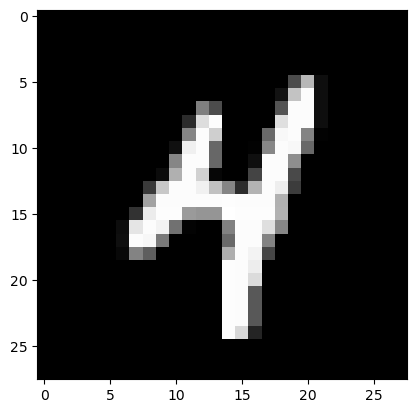

In [21]:
test_prediction(10,W1,b1,W2,b2)